In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Ensure the necessary data files are available
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
def construct_graph(text, threshold=0.5):
    # Split text into sentences
    sentences = nltk.sent_tokenize(text)

    # Load pre-trained Sentence Transformer model
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embeddings = model.encode(sentences, convert_to_tensor=True)

    # Calculate cosine similarity matrix
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

    # Create graph
    G = nx.Graph()

    for i, sentence in enumerate(sentences):
        G.add_node(i, sentence=sentence)

    for i in range(len(sentences)):
        for j in range(i+1, len(sentences)):
            if cosine_scores[i][j] > threshold:
                G.add_edge(i, j, weight=cosine_scores[i][j].item())

    #drawing part of your construct_graph function
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, labels={i: i for i in G.nodes()}, node_size=500, node_color="skyblue", font_size=12, font_color="black")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
    plt.show()



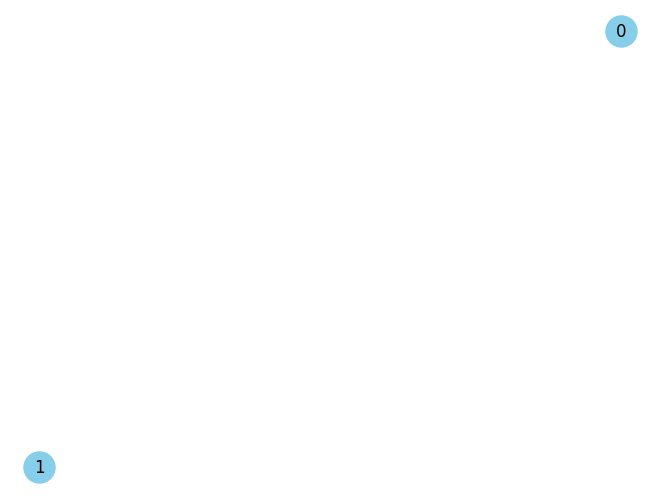

In [43]:
# Example usage
text1 = """I am particularly fond of Python for its versatility and readability.
 It has a robust ecosystem of libraries that make it ideal for Big Data and Machine Learning,
 enabling efficient data manipulation and analysis."""

construct_graph(text1)

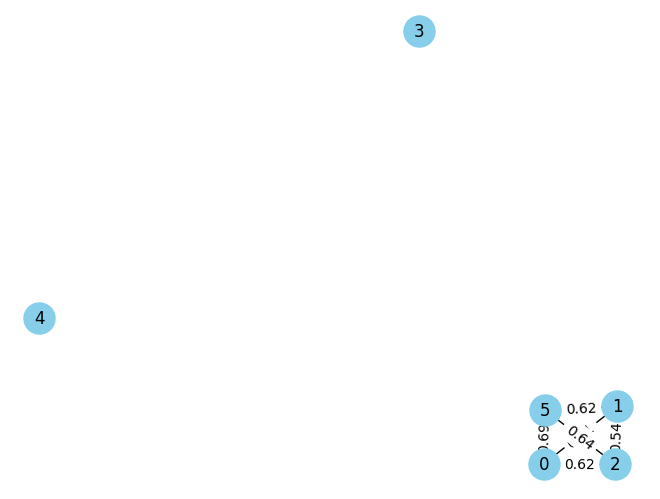

In [41]:
# Example usage
text2 = """Machine learning is a field of artificial intelligence.
              It uses statistical techniques to give computer systems the ability to learn from data.
              In machine learning, algorithms build a model based on sample data.
              This process is known as training the model.
              The model can then make predictions or decisions without being explicitly programmed to perform the task.
              Machine learning is closely related to computational statistics, which also focuses on prediction-making through the use of computers."""

construct_graph(text2)

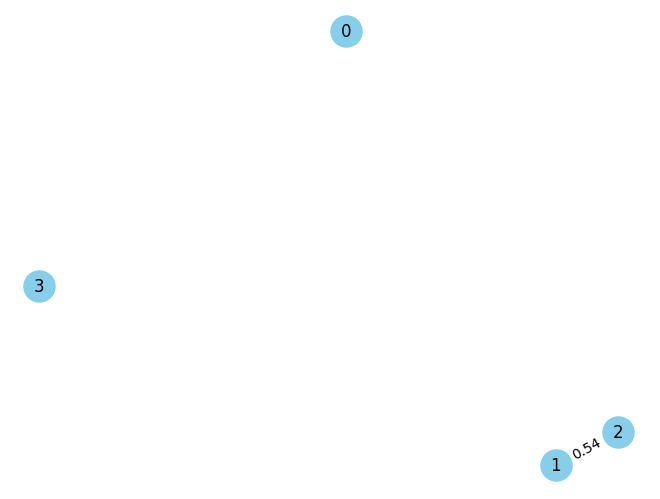

In [42]:
# Example usage
text3= """Virtual reality is an exciting technology. It immerses users in digital environments.
          This technology has applications in gaming, education, and healthcare.
          It provides innovative experiences unlike traditional media."""

construct_graph(text3)